In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread, imsave
from PIL import Image
from tqdm import tqdm_notebook
import seaborn as sns

sns.set()

%matplotlib inline

In [2]:
train_data = pd.read_csv(os.path.join(os.getcwd(), '..', 'data', 'final_dataset_train.csv'))
val_data = pd.read_csv(os.path.join(os.getcwd(), '..', 'data', 'final_dataset_val.csv'))
test_data = pd.read_csv(os.path.join(os.getcwd(), '..', 'data', 'final_dataset_test.csv'))

In [3]:
images_folder = os.path.join(os.getcwd(), '..', 'data', 'images', 'images-resized')

In [4]:
total_data = pd.concat([train_data, val_data, test_data])

In [5]:
total_data.head()

,sequence,image1,image2,image3,has_animal,mask_MOG2,mask_flow1
0,2,290716114012001a1116.JPG,290716114014001a1114.JPG,290716114014001a1115.JPG,1,2_mask_MOG2.png,2_mask_flow1.png
1,3,280716130614001a1111.JPG,280716130614001a1112.JPG,280716130614001a1113.JPG,0,3_mask_MOG2.png,3_mask_flow1.png
2,4,280716130526001a1113.JPG,280716130528001a1111.JPG,280716130528001a1112.JPG,0,4_mask_MOG2.png,4_mask_flow1.png
3,5,250716162756001a1113.JPG,250716162758001a1111.JPG,250716162758001a1112.JPG,0,5_mask_MOG2.png,5_mask_flow1.png
4,6,250716130638001a1113.JPG,250716130640001a1111.JPG,250716130640001a1112.JPG,0,6_mask_MOG2.png,6_mask_flow1.png


In [6]:
hist_all_data = []
hist_animals = []
hist_backgrounds = []

In [7]:
for idx, row in tqdm_notebook(total_data.iterrows()):
    img = imread(os.path.join(images_folder, row['mask_MOG2']))
    img = (img > 0.1).astype(np.uint8)
    mean = np.mean(img)
    hist_all_data.append(mean)
    if row['has_animal']:
        hist_animals.append(mean)
    else:
        hist_backgrounds.append(mean)

/Users/Darshan/anaconda3/envs/camera_trap/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


/Users/Darshan/anaconda3/envs/camera_trap/lib/python3.7/site-packages/seaborn/distributions.py:200: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  line, = ax.plot(a.mean(), 0)
/Users/Darshan/anaconda3/envs/camera_trap/lib/python3.7/site-packages/seaborn/distributions.py:352: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


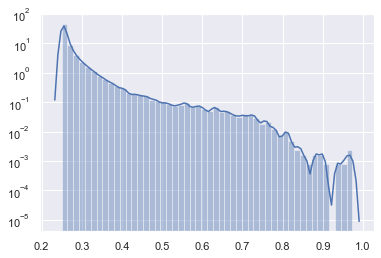

In [19]:
plt.yscale('log')
sns.distplot(hist_all_data)

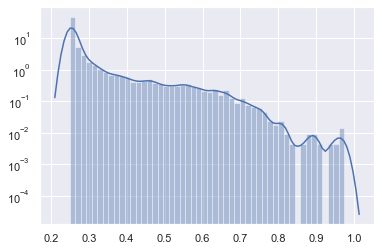

In [21]:
plt.yscale('log')
sns.distplot(hist_backgrounds)

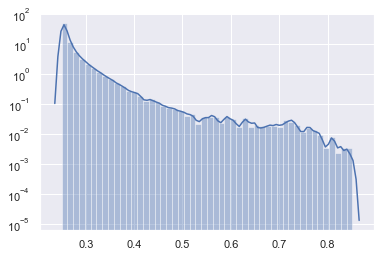

In [22]:
plt.yscale('log')
sns.distplot(hist_animals)